# Iniciação Tecnológica

---

## Desenvolvimento aplicação web

- Matheus Percário Bruder | 222327

### Teste de acurária das fórmulas em python

Este notebook será responsável por ler, processar, fazer os testes de acurácia das equações de conversão e, por fim, plotar gráficos de regressão linear comparando o resultado obtido (Y) com o esperado (X).

## Importar dados

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [48]:
cols = ['DBE', 'DBT', 'DAE', 'DAT']

In [49]:
df = pd.read_csv('d-densidade.csv', names=cols, header=0)

In [50]:
df.set_index(np.arange(1, 51), inplace=True)

In [51]:
df.tail()

,DBE,DBT,DAE,DAT
46,0.404,0.420,0.572,0.602
47,0.437,0.452,0.518,0.542
48,0.388,0.402,0.531,0.575
49,0.439,0.451,0.531,0.553
50,0.394,0.409,0.517,0.586


## Processar dados

In [58]:
dens_bas = ['DBE', 'DBT']
dens_ap = ['DAE', 'DAT']

In [57]:
df[dens_bas].head()

,DBE,DBT
1,0.434,0.465
2,0.413,0.429
3,0.496,0.506
4,0.442,0.439
5,0.477,0.457


In [59]:
df[dens_ap].head()

,DAE,DAT
1,0.541,0.550
2,0.597,0.620
3,0.554,0.573
4,0.583,0.610
5,0.600,0.612


## Correlação

In [75]:
# Aparente -> Básica
corr = df[dens_bas].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,DBE,DBT
DBE,1.00,0.83
DBT,0.83,1.00


In [76]:
# Básica -> Aparente
corr = df[dens_ap].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,DAE,DAT
DAE,1.00,0.79
DAT,0.79,1.00


## Regressão Linear

In [112]:
Xa = df[dens_ap].iloc[:, 0].values
ya = df[dens_ap].iloc[:, 1].values

In [113]:
Xb = df[dens_bas].iloc[:, 0].values
yb = df[dens_bas].iloc[:, 1].values

In [114]:
Xa = Xa.reshape(-1,1)
Xb = Xb.reshape(-1,1)

In [115]:
reg_a = LinearRegression()
reg_b = LinearRegression()
reg_a.fit(Xa, ya)
reg_b.fit(Xb, yb)

LinearRegression()

In [116]:
reg_b.coef_, reg_b.intercept_

(array([0.70281218]), 0.1329604683892162)

## Plotagem gráfico

In [165]:
text_a = f'y = {reg_b.coef_[0]:.4f}x + {reg_b.intercept_:.3f}\nR² = {reg_b.score(Xb, yb):.4f}'
text_b = f'y = {reg_a.coef_[0]:.4f}x + {reg_a.intercept_:.3f}\nR² = {reg_a.score(Xa, ya):.4f}'

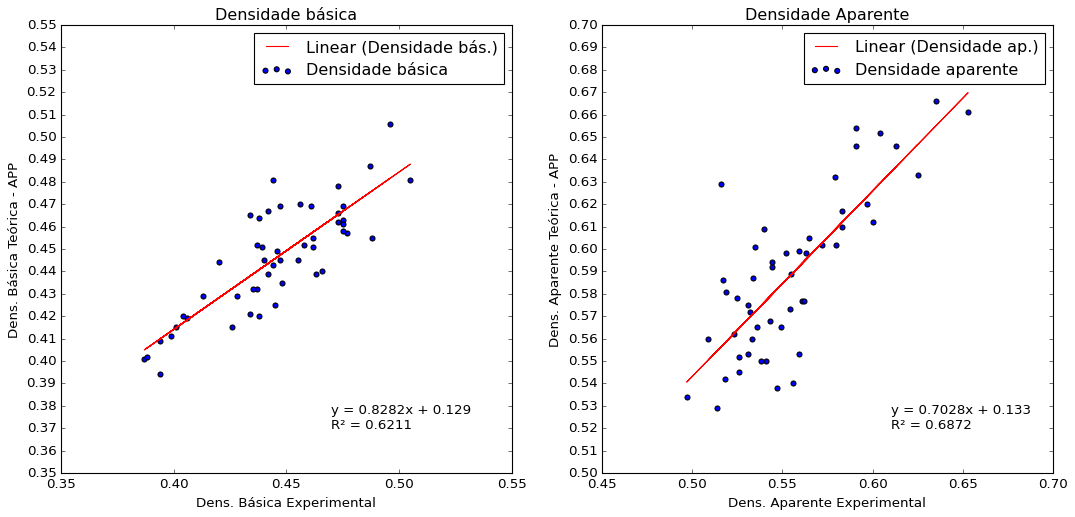

In [179]:
fig = plt.figure(figsize=(16, 7), facecolor='white')
plt.style.use('classic')

# Definindo subgráficos
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Densidade Aparente -> Básica
ax1.scatter(Xb, yb)
ax1.plot(Xb, reg_b.predict(Xb), color = 'red')
ax1.set_xticks(np.arange(0.35, 0.60, 0.05, float))
ax1.set_xlabel('Dens. Básica Experimental')
ax1.set_yticks(np.arange(0.35, 0.55, 0.01, float))
ax1.set_ylabel('Dens. Básica Teórica - APP')
ax1.set_title('Densidade básica')
ax1.legend(['Linear (Densidade bás.)', 'Densidade básica'], loc='best')
ax1.text(0.47, 0.37, text_b)

# Densidade Básica -> Aparente
ax2.scatter(Xa, ya)
ax2.plot(Xa, reg_a.predict(Xa), color = 'red')
ax2.set_xticks(np.arange(0.45, 0.75, 0.05, float))
ax2.set_xlabel('Dens. Aparente Experimental')
ax2.set_yticks(np.arange(0.5, 0.71, 0.01, float))
ax2.set_ylabel('Dens. Aparente Teórica - APP')
ax2.set_title('Densidade Aparente')
ax2.legend(['Linear (Densidade ap.)', 'Densidade aparente'], loc='best')
ax2.text(0.61, 0.52, text_a)


# Salvar figura
plt.savefig('reg_linear.png')